# Doing Bayesian Data Analysis

Simple example from __Chapter 16__.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt
from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sns

# Kruschke's light blue color
sns.set_palette(["#87ceeb"])
sns.set_context("talk")

In [2]:
# True params: mu = 100, sigma = 15
data = [85, 100, 115]
# Another possibility for observed data...
# y = st.norm(100, 15).rvs(5).round()
print data

with pm.Model() as model:
    # Priors
    tau = pm.Gamma("tau", .001, .001)
    mu = pm.Normal("mu", mu=0, tau=1E-8)
    # Likelihood
    y = pm.Normal("y", mu=mu, tau=tau, observed=data)
    # Sample
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(10000, step, start)
    
burn_in = 5000

[85, 100, 115]
Optimization terminated successfully.
         Current function value: 28.821201
         Iterations: 36
         Function evaluations: 41
         Gradient evaluations: 41


100%|██████████| 10000/10000 [00:01<00:00, 6544.56it/s]


          mean         sd  mc_error    hpd_2.5    hpd_97.5
mu   98.877912  18.048947  0.631080  62.787982  133.645260
tau   0.004286   0.004381  0.000153   0.000013    0.012855


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117f72750>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119010150>]], dtype=object)

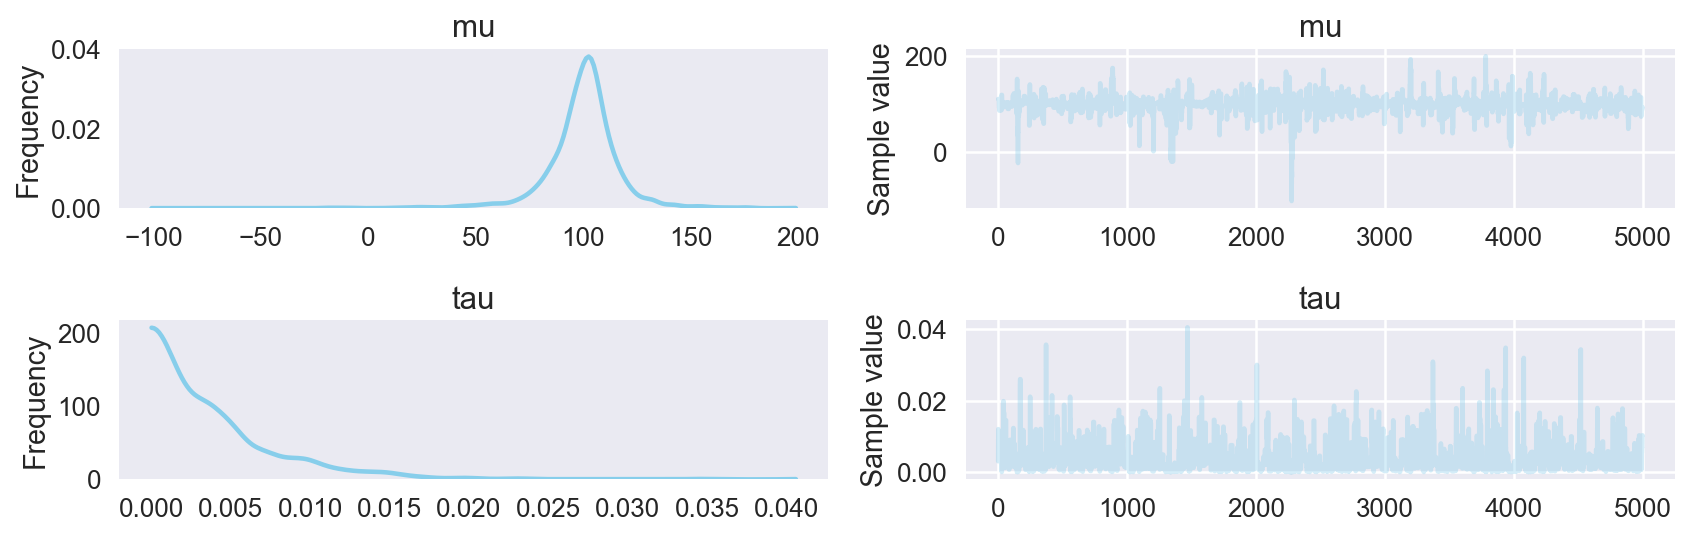

In [3]:
print pm.df_summary(trace[burn_in:])
pm.traceplot(trace[burn_in:])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x119132210>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x119a18b10>], dtype=object)

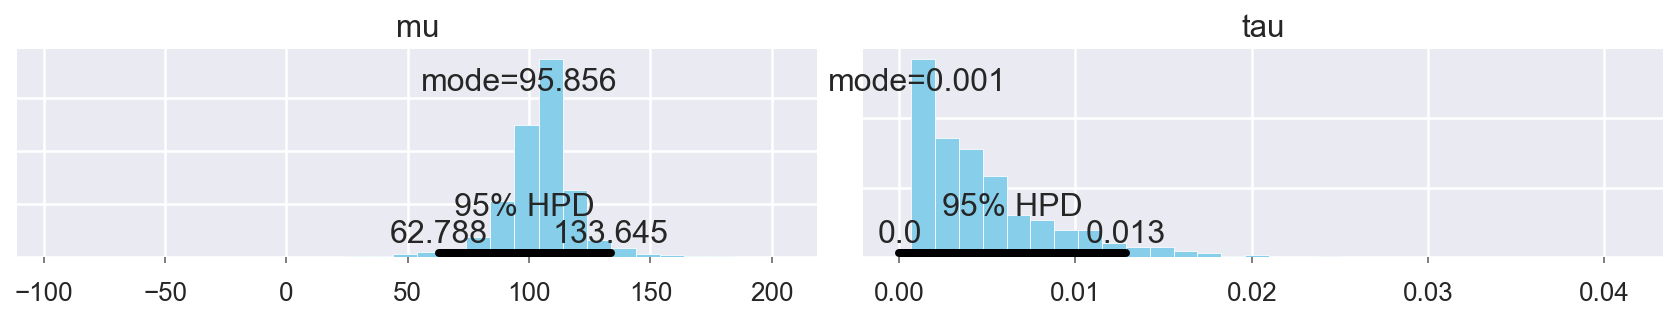

In [4]:
pm.plot_posterior(trace[burn_in:], point_estimate="mode")

### Extra Credit

It's a simple exercise, but wanted to test out two additional models:

* Use [Gelman's recommendation][gelman] of a `HalfCauchy` distribution for `sigma`
* A robust model with the `StudentT` distribution for likelihood

[gelman]: http://www.stat.columbia.edu/~gelman/research/published/taumain.pdf

In [5]:
with pm.Model() as gelman_model:
    # Priors
    sigma = pm.HalfCauchy("sigma", 10)
    mu = pm.Normal("mu", mu=0, tau=1E-8)
    # Likelihood
    y = pm.Normal("y", mu=mu, sd=sigma, observed=data)
    # Sample
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(10000, step, start)

Optimization terminated successfully.
         Current function value: 23.064413
         Iterations: 28
         Function evaluations: 36
         Gradient evaluations: 36


100%|██████████| 10000/10000 [00:10<00:00, 952.50it/s]


             mean         sd  mc_error    hpd_2.5    hpd_97.5
mu     100.534144  16.703710  0.315879  64.467646  127.509064
sigma   21.917551  15.183948  0.655382   7.373608   49.935805


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c8fc990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ca66b50>]], dtype=object)

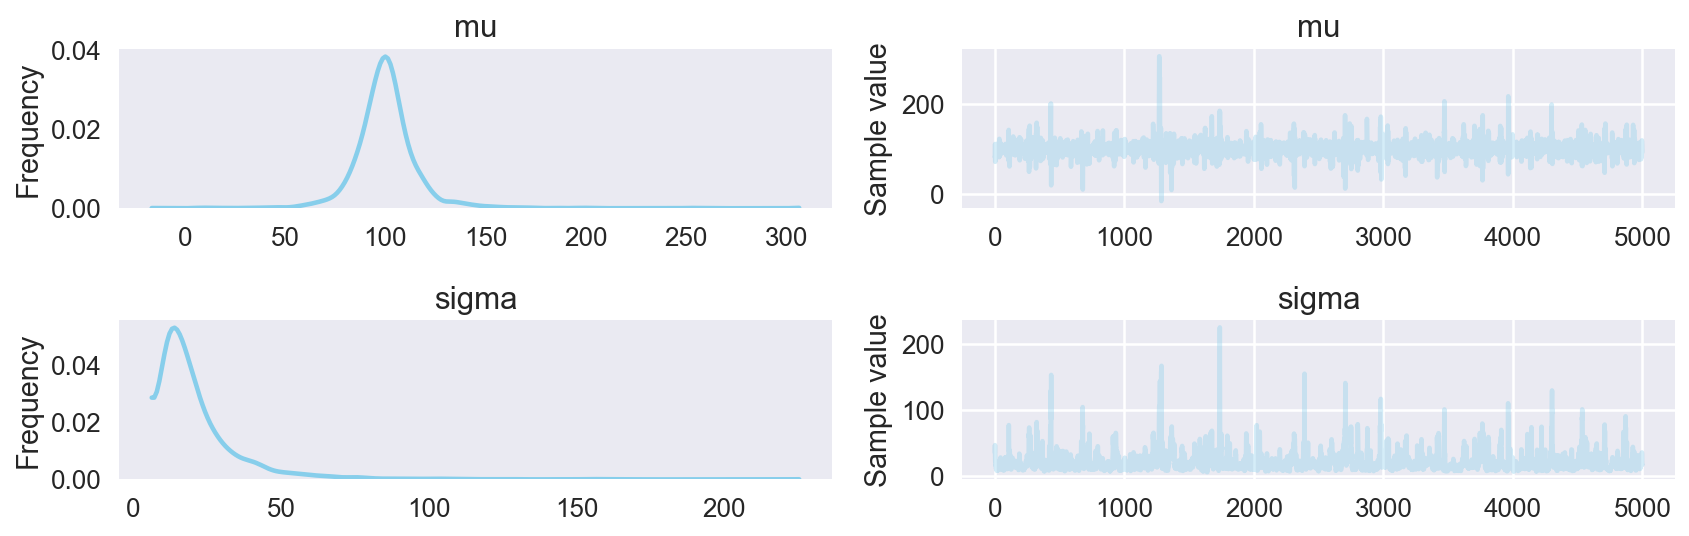

In [6]:
print pm.df_summary(trace[burn_in:])
pm.traceplot(trace[burn_in:])

In [7]:
# Mixing in a dash of robust estimation...
with pm.Model() as t_model:
    # Priors
    sigma = pm.HalfCauchy("sigma", 25)
    mu = pm.Normal("mu", mu=0, tau=1E-8)
    nu = pm.HalfCauchy("nu", 3)
    # Likelihood
    y = pm.StudentT("y", nu=nu, mu=mu, sd=sigma, observed=data)
    # Sample
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(10000, step, start)

Optimization terminated successfully.
         Current function value: 24.733032
         Iterations: 29
         Function evaluations: 34
         Gradient evaluations: 34


100%|██████████| 10000/10000 [00:22<00:00, 449.74it/s]


             mean         sd  mc_error    hpd_2.5    hpd_97.5
mu     100.181464  19.992933  0.480427  65.939656  137.881047
sigma   22.718631  19.774858  0.658089   2.513316   53.933612
nu      11.358554  42.765253  1.218563   0.057958   37.683560


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fb2f450>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121a93550>]], dtype=object)

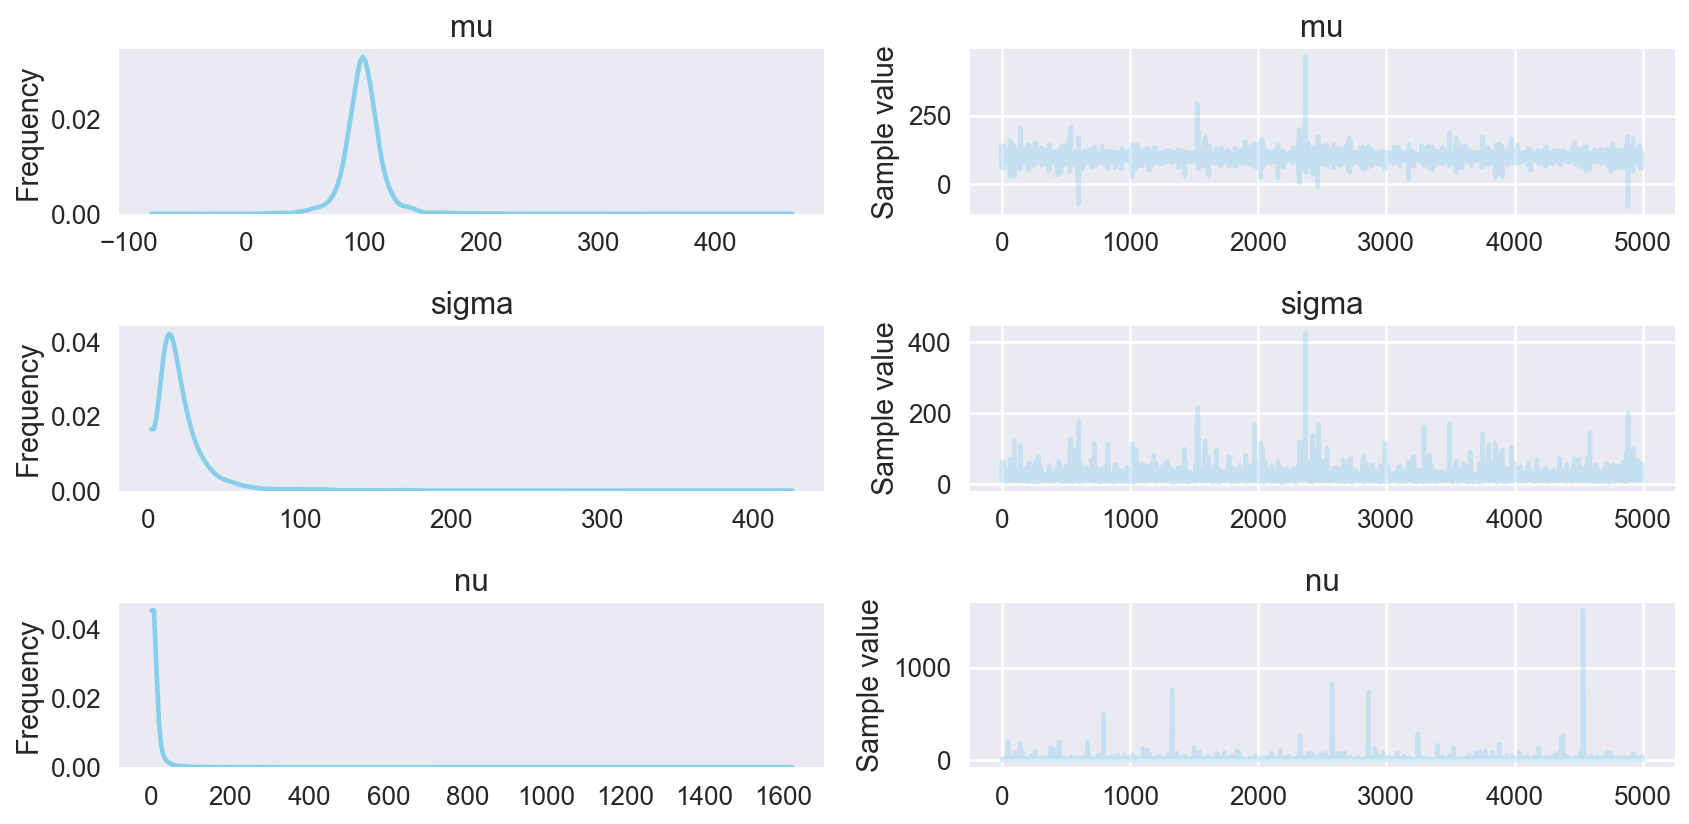

In [8]:
print pm.df_summary(trace[burn_in:])
pm.traceplot(trace[burn_in:])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x121c4ad50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1229dc090>], dtype=object)

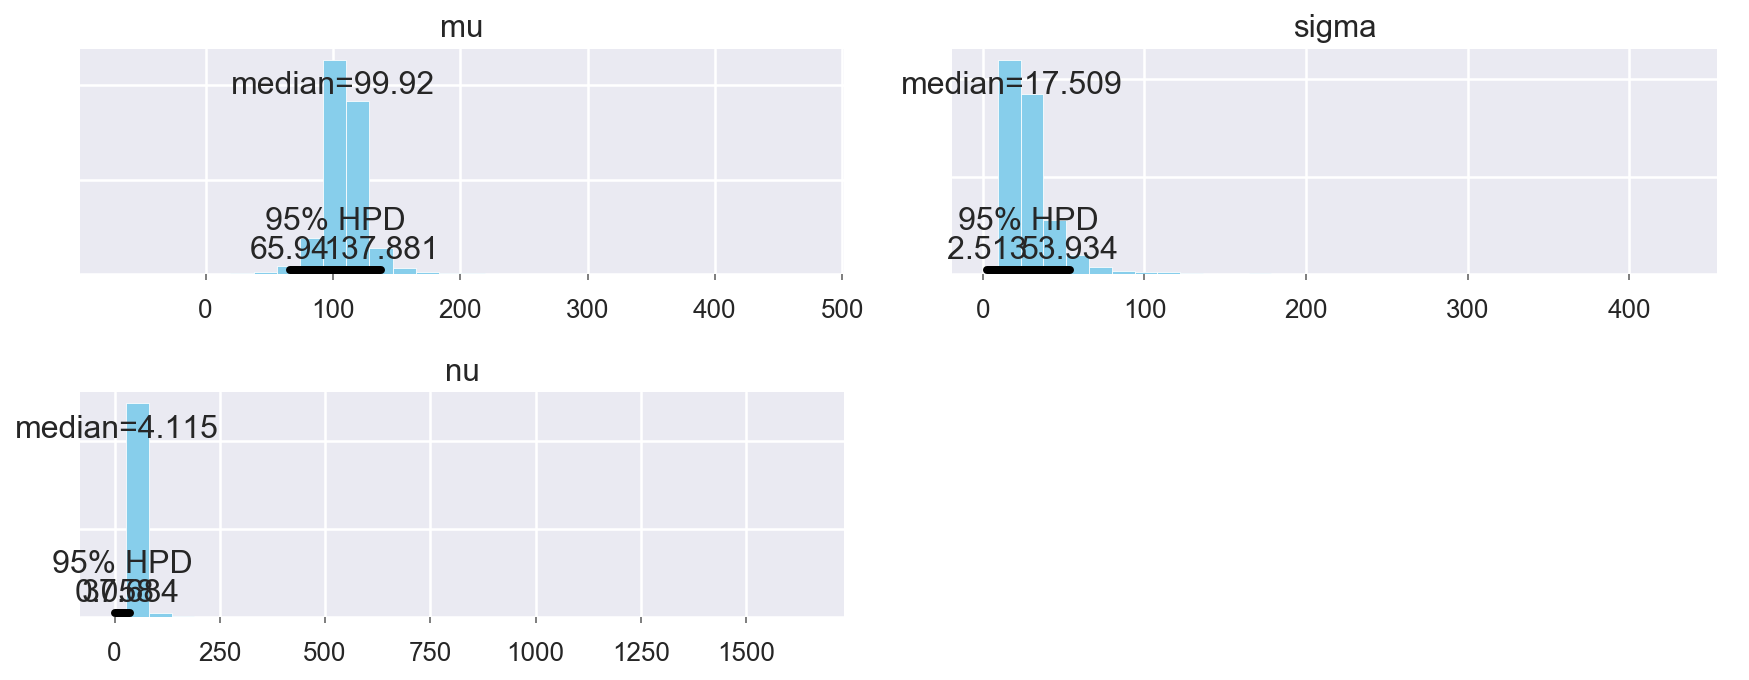

In [9]:
pm.plot_posterior(trace[burn_in:], point_estimate="median")

In [10]:
# Wanted to take a closer look at `nu`
pm.summary(trace[burn_in:], varnames=["nu"])


nu:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  11.359           42.765           1.219            [0.058, 37.684]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.628          2.134          4.116          8.955          61.852

